## ANALYSIS SALES 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("sales_data.csv")
df.head()

,date,product,category,price,quantity,revenue
0,1/1/2022,Smartphone,Electronics,600.0,10.0,6000.0
1,1/1/2022,Laptop,Electronics,1200.0,5.0,6000.0
2,1/2/2022,T-Shirt,Clothing,20.0,50.0,1000.0
3,1/3/2022,Headphones,Electronics,100.0,20.0,2000.0
4,1/4/2022,T-Shirt,Clothing,20.0,25.0,500.0


In [5]:
new_df=df.dropna()
new_df

,date,product,category,price,quantity,revenue
0,1/1/2022,Smartphone,Electronics,600.0,10.0,6000.0
1,1/1/2022,Laptop,Electronics,1200.0,5.0,6000.0
2,1/2/2022,T-Shirt,Clothing,20.0,50.0,1000.0
3,1/3/2022,Headphones,Electronics,100.0,20.0,2000.0
4,1/4/2022,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,12/27/2022,Watch,Accessories,150.0,5.0,750.0
365,12/28/2022,Coat,Clothing,100.0,5.0,500.0
366,12/29/2022,Headphones,Electronics,100.0,10.0,1000.0
367,12/30/2022,Smartphone,Electronics,600.0,11.0,6600.0


In [6]:
# to describe data 
df.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


# Cleaning Data


In [84]:
# 
num_duplicated=df.duplicated().sum()
num_duplicated

0

In [8]:
delete=df.drop_duplicates(inplace=True)
delete

## Before cleaning

In [9]:
df.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [10]:
list_null=['price','quantity','revenue']
for i in list_null:
    df.dropna(subset=[i], inplace=True)

## After cleaning

In [11]:
df.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

In [12]:
# To seee information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      364 non-null    object 
 1   product   364 non-null    object 
 2   category  364 non-null    object 
 3   price     364 non-null    float64
 4   quantity  364 non-null    float64
 5   revenue   364 non-null    float64
dtypes: float64(3), object(3)
memory usage: 15.6+ KB


In [13]:
# to see names of columns in file 

df.keys()

Index(['date', 'product', 'category', 'price', 'quantity', 'revenue'], dtype='object')

## What was the total revenue generated by the company over the course of the year?

In [14]:
Total_revenue=df['revenue'].sum()
f'The totat revenue generreted by the company :{Total_revenue} $'

'The totat revenue generreted by the company :747230.0 $'

## Which product had the highest revenue? How much revenue did it generate?

In [26]:
df[df['revenue']==df['revenue'].max()]['product']




13     Smartphone
44     Smartphone
72     Smartphone
103    Smartphone
134    Smartphone
164    Smartphone
195    Smartphone
225    Smartphone
256    Smartphone
287    Smartphone
318    Smartphone
348    Smartphone
Name: product, dtype: object

## What was the average price of a product sold by the company?

In [25]:
avarage_price=df['price'].mean()
f'The avarage price of aproduct sold by the company: {avarage_price}'


'The avarage price of aproduct sold by the company: 210.65934065934067'

In [17]:
# to calculate the mean of price per product
mean_price = df.groupby('product')['price'].mean()
mean_price

product
Backpack        50.0
Coat           100.0
Headphones     100.0
Hoodie          40.0
Jeans           50.0
Laptop        1200.0
Smartphone     600.0
Smartwatch     200.0
Sneakers        80.0
Speaker         80.0
T-Shirt         20.0
Tablet         400.0
Wallet          30.0
Watch          150.0
Name: price, dtype: float64

## What was the total quantity of products sold by the company?


In [18]:
# to caluclate total of quantity per product
mean_quantity = df.groupby('product')['quantity'].sum()
mean_quantity


product
Backpack       408.0
Coat           338.0
Headphones     180.0
Hoodie         495.0
Jeans          413.0
Laptop           5.0
Smartphone     713.0
Smartwatch     294.0
Sneakers       270.0
Speaker        496.0
T-Shirt       1005.0
Tablet          45.0
Wallet         405.0
Watch          203.0
Name: quantity, dtype: float64

## Which category had the highest revenue? How much revenue did it generate?


In [19]:
category=df[df['category']==df['category'].max()]['revenue']
f'The category haa the highest revenue : {category} \n '

'The category haa the highest revenue : 359    960.0\nName: revenue, dtype: float64 \n '

## What was the average revenue per sale?

In [20]:
mean_revenue = df.groupby('product')['revenue'].mean()
mean_revenue


product
Backpack       850.000000
Coat           965.714286
Headphones    1384.615385
Hoodie         860.869565
Jeans          860.416667
Laptop        6000.000000
Smartphone    5281.481481
Smartwatch    1680.000000
Sneakers       900.000000
Speaker       1587.200000
T-Shirt        528.947368
Tablet        2000.000000
Wallet        1104.545455
Watch         1450.000000
Name: revenue, dtype: float64

## What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [21]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [22]:
# the first step is convert date into moth to do relation between month and revenue

df['Month'] = pd.to_datetime(df['date']).dt.strftime('%B')
df

,date,product,category,price,quantity,revenue,month,Month
0,1/1/2022,Smartphone,Electronics,600.0,10.0,6000.0,1,January
1,1/1/2022,Laptop,Electronics,1200.0,5.0,6000.0,1,January
2,1/2/2022,T-Shirt,Clothing,20.0,50.0,1000.0,1,January
3,1/3/2022,Headphones,Electronics,100.0,20.0,2000.0,1,January
4,1/4/2022,T-Shirt,Clothing,20.0,25.0,500.0,1,January
...,...,...,...,...,...,...,...,...
364,12/27/2022,Watch,Accessories,150.0,5.0,750.0,12,December
365,12/28/2022,Coat,Clothing,100.0,5.0,500.0,12,December
366,12/29/2022,Headphones,Electronics,100.0,10.0,1000.0,12,December
367,12/30/2022,Smartphone,Electronics,600.0,11.0,6600.0,12,December


In [76]:
# relation between revenue and month

revenue_month = df.groupby('Month')['revenue'].sum()
revenue_month

Month
April        55800.0
August       65260.0
December     64010.0
February     53740.0
January      65800.0
July         67260.0
June         58660.0
March        62560.0
May          62910.0
November     63060.0
October      65260.0
September    62910.0
Name: revenue, dtype: float64

In [39]:
# to calculate the sum of revenue for 4 monthes in the year 2022

# def calc_Qarter(1,5)
def calc_Quarter(start_month, end_month):
    quarter_revenue = df[(df['month'] >= start_month) & (df['month'] < end_month)]['revenue'].sum()
    return quarter_revenue

print(f'The Q1 revenue is: {calc_Quarter(1, 4)}')
print(f'The Q2 revenue is: {calc_Quarter(4, 7)}')
print(f'The Q3 revenue is: {calc_Quarter(7, 10)}')
print(f'The Q4 revenue is: {calc_Quarter(10, 13)}')

    

The Q1 revenue is: 182100.0
The Q2 revenue is: 177370.0
The Q3 revenue is: 195430.0
The Q4 revenue is: 192330.0


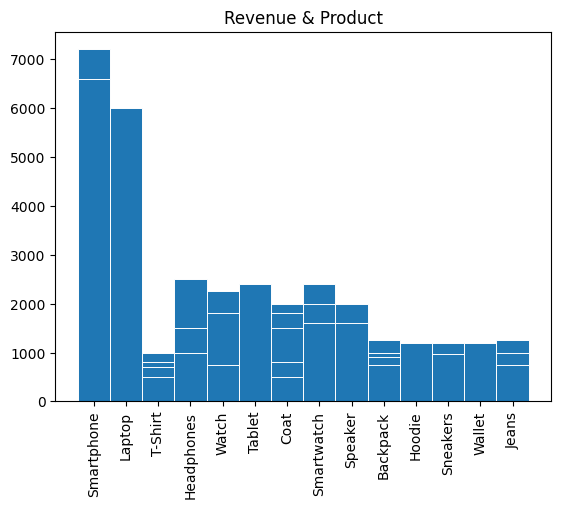

In [36]:
x=df['product']
y=df['revenue']
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.title('Revenue & Product')
plt.xticks(rotation=90)
plt.show()

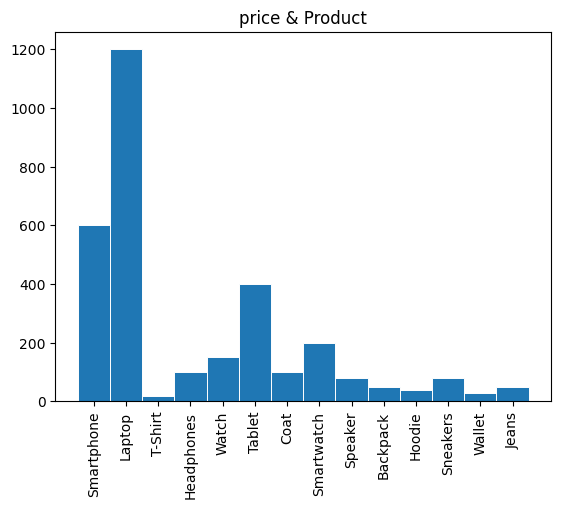

In [54]:
x=df['product']
y=df['price']
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.title('price & Product')
plt.xticks(rotation=90)
plt.show()

# The laptop has the highst price in all products


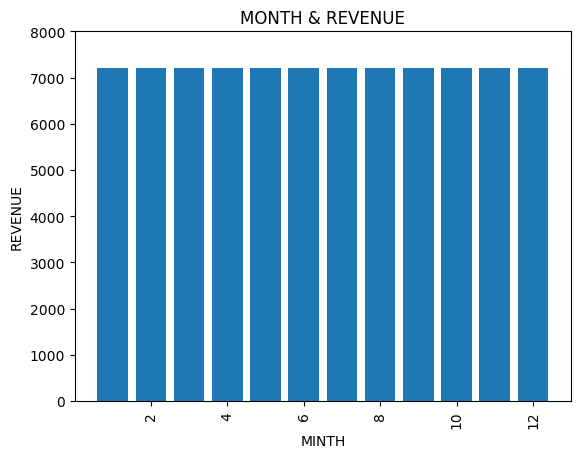

In [83]:
x=df['month']
y=df['revenue']
fig, ax = plt.subplots()

ax.bar(x, y, linewidth=1)
plt.xticks(rotation=90)
plt.title('MONTH & REVENUE')
plt.xlabel('MINTH')
plt.ylabel('REVENUE')
plt.ylim(0, 8000)

plt.show()
